# Agriculture Case Study
Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

# Problem Statement
We need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA(Exploratory Data Analysis)

In [2]:
# Read excel files
train_df=pd.read_excel("/Users/bhupendrakumar/Documents/ML Data Scientist Projects/Data-Science-ML-Capstone-Projects-master/train_agriculture.xlsx")
test_df=pd.read_excel("/Users/bhupendrakumar/Documents/ML Data Scientist Projects/Data-Science-ML-Capstone-Projects-master/test_agriculture.xlsx")

In [3]:
print(train_df.shape)
print(test_df.shape)

(4599, 10)
(1199, 9)


In [4]:
train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
test_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [6]:
# Data Types of features
train_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [7]:
test_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [8]:
# Missing Value Analysis
train_df.isna().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [9]:
test_df.isna().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [10]:
# Imputing missing values
print(train_df['Number_Weeks_Used'].mean())
print(test_df['Number_Weeks_Used'].mean())
# Mean for individual data set is different.

28.89102718306471
29.033333333333335


In [11]:
# Computing mean for entire data set(Combining train and test values of Number_Weeks_Used column
total_instances=len(train_df['Season'])+len(test_df['Season'])-119-442
sum_WeeksUsed=train_df['Number_Weeks_Used'].sum()+test_df['Number_Weeks_Used'].sum()
total_Mean=sum_WeeksUsed/total_instances
print(total_instances, sum_WeeksUsed,total_Mean, )
print()

5237 151456.0 28.92037426007256



In [12]:
print(train_df['Number_Weeks_Used'].median())
print(test_df['Number_Weeks_Used'].median())

28.0
28.0


In [13]:
# There is no much difference between mean and median, I am going to impute missing values by mean.
train_df['Number_Weeks_Used'].fillna(28.92037426007256,inplace=True)
test_df['Number_Weeks_Used'].fillna(28.92037426007256,inplace=True)

In [14]:
print("******* train **********")
print(train_df.isna().sum())
print("******* test **********")
print(test_df.isna().sum())
# No more null values present

******* train **********
ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64
******* test **********
ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64


In [15]:
train_df['Crop_Damage'].value_counts()
# It's an imbalanced dataset, either we can create dummy data or Decision tree and Random Forest are good Alg's in 
#  such cases.
# 0 indicates not damaged and 1, 2 as damaged due to separate reasons.

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [16]:
# We can mark 1 and 2 as 1. Since, both represents as damaged crops.
train_df['Crop_Damage'].replace(to_replace=2,value=1,inplace=True)

In [17]:
train_df['Crop_Damage'].value_counts()
# Still it's an imbalaced dataset

0    3820
1     779
Name: Crop_Damage, dtype: int64

In [18]:
train_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.893848,9.205479,1.894325,0.169385
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965788,9.713253,0.694952,0.375132
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.920374,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,1.000000


In [19]:
train_df['Crop_Type'].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

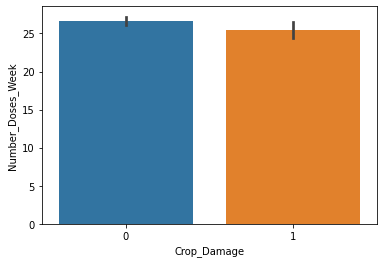

In [20]:
# Bar plots
sns.barplot(x='Crop_Damage',y='Number_Doses_Week',data=train_df)
# No major difference and hard to distinguish the ranges for crop damage.

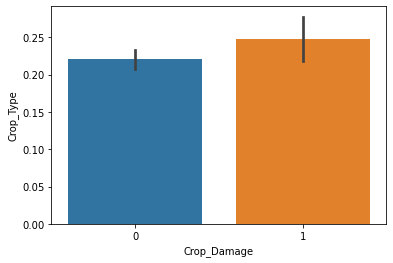

In [21]:
sns.barplot(x='Crop_Damage',y='Crop_Type',data=train_df)

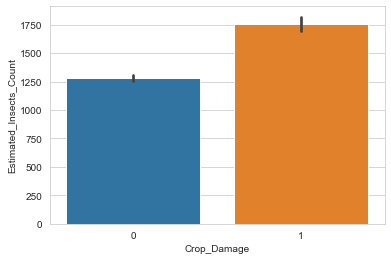

In [22]:
sns.set_style('whitegrid')
sns.barplot(x='Crop_Damage',y='Estimated_Insects_Count',data=train_df)
# If count is > 1250 then it's mostly going to be a damaged crop. It is going to be an essential feature for prediction.

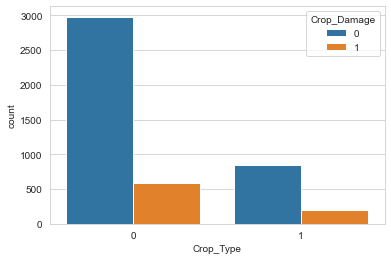

In [23]:
# Let's explore through Countplot
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=train_df)
# In case of crop type 0, the damage is very less, similar is in the case of crop type 1. 
# Till now major factor is estimated insects, going to be helpful for predictions.

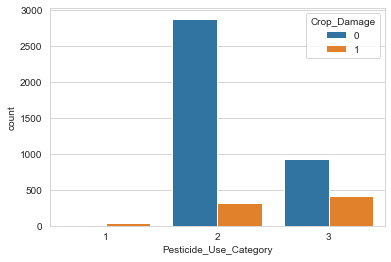

In [24]:
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=train_df)
# In 1st category, crop damages is close to 100%. So, ahead we can stop using pesticides belonging to category 1.
# In category 2 ration of crops not damaged is higher than damaged.
# In 3rd category Crop saved is hogher though but ratiokn is still less than 2nd category. 
# 2nd category can be preferred for harvesting.

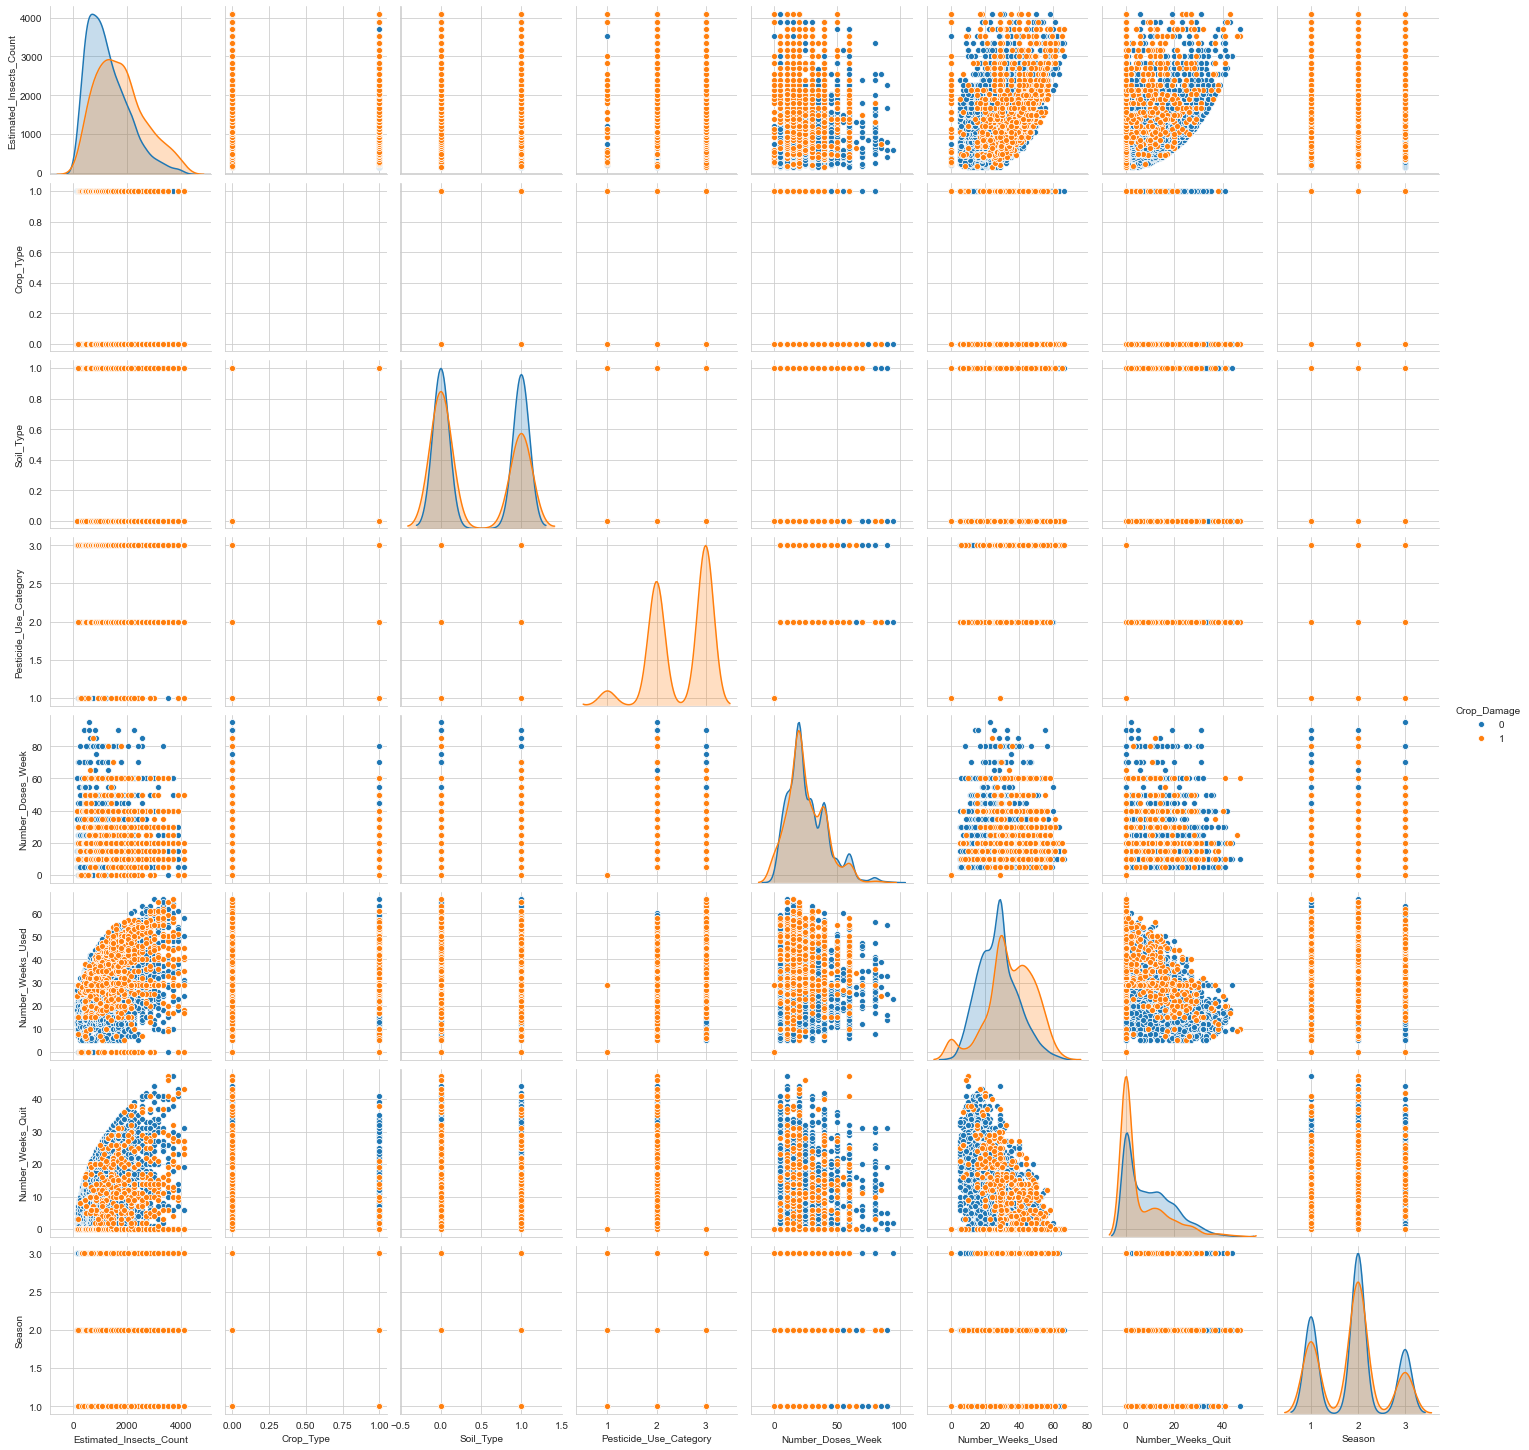

In [25]:
# Pair plot
sns.pairplot(train_df,hue='Crop_Damage')

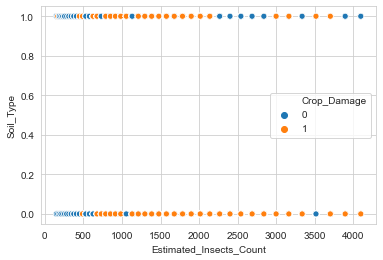

In [26]:
# Bivariate Analysis
sns.scatterplot(x='Estimated_Insects_Count',y='Soil_Type',hue='Crop_Damage',data=train_df)
# In soil type 0, after 600 insects count, damaged crop is more. Befor 600 mostly all crops have been saved.
# In type 1 before 600 insect counts mostly all crops have been saved, if >600 hard to distinguish.

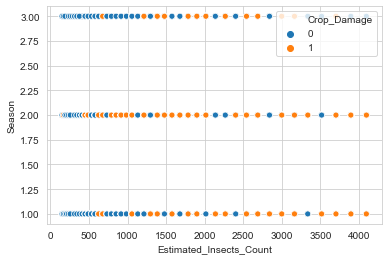

In [27]:
sns.scatterplot(x='Estimated_Insects_Count',y='Season',hue='Crop_Damage',data=train_df)
# In season 1, if insects count < 1300, most of the crops have been saved. If >1300 most of the crops are damaged.
# In season 2, if insects count < 500, damaged crop is less. If >500 most of the crops are damaged.
# In season 3, if insects count < 1300, most of the crops have been saved. If >1300 most of the crops are damaged.

## Feature Selection

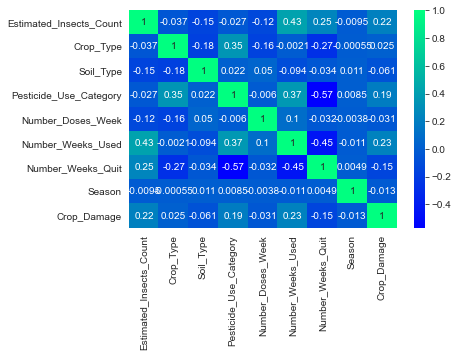

In [28]:
# Plot heat map
corr_mat=train_df.corr()
sns.heatmap(corr_mat,annot=True,cmap='winter')

In [29]:
# We can drop ID column, as it won't be helpful in case of training our model
train_df.drop('ID',axis=1,inplace=True)
test_df.drop('ID',axis=1,inplace=True)

### Outlier Analysis

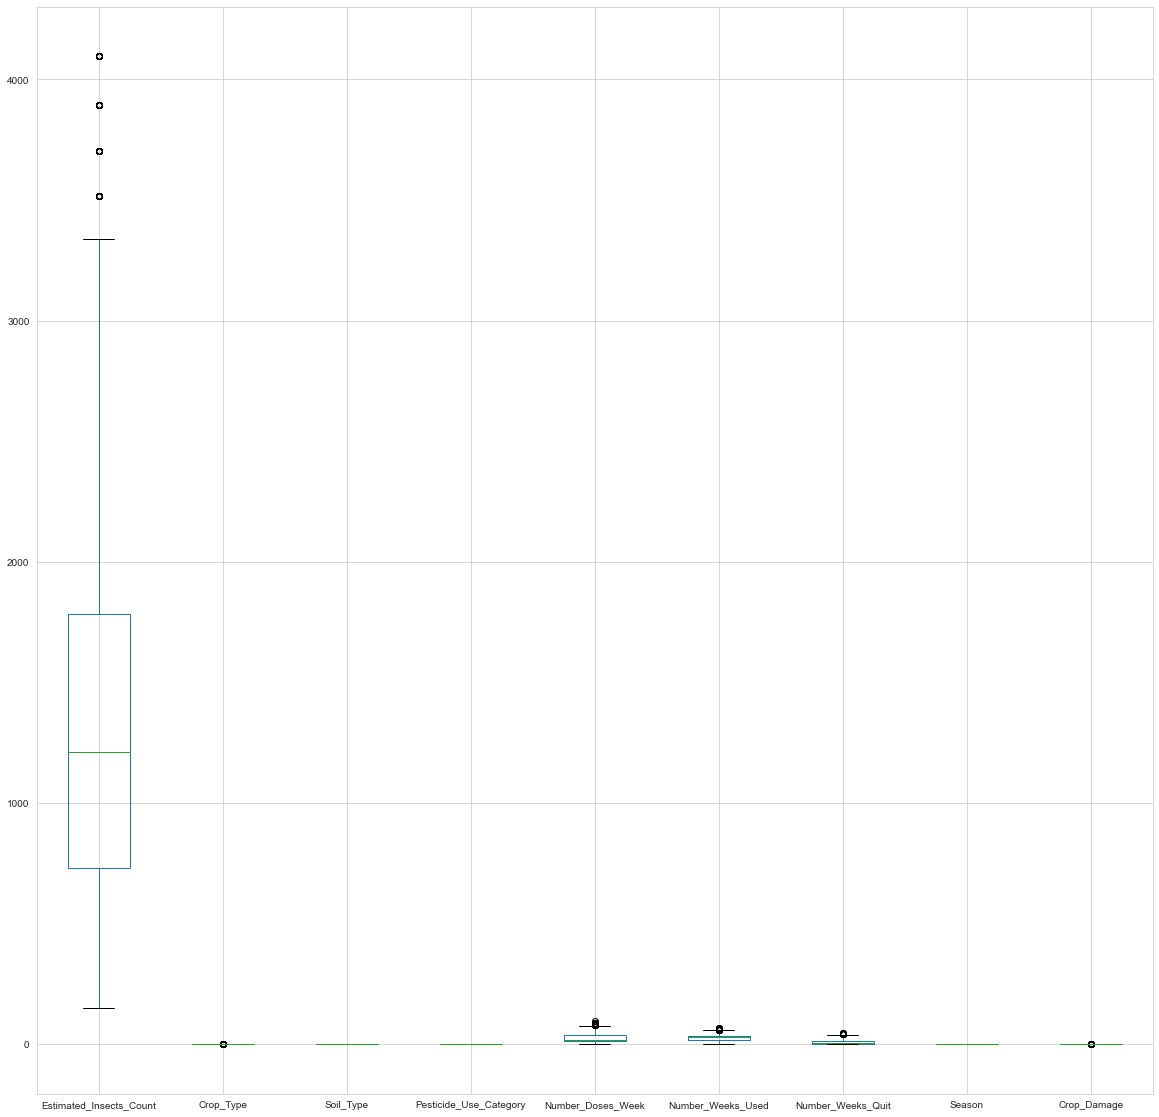

In [30]:
columnList=list(train_df.columns)

plt.figure(figsize=(20,20))
train_df.boxplot(column=columnList)
# I am not going to remove any outlier. As they are present in Estimated insect counts and they are going to be useful.

## Model selection

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [32]:
Y=train_df['Crop_Damage']
X=train_df.drop('Crop_Damage',axis=1)

In [33]:
print(Y.shape)
print(X.shape)
print(X.columns)

(4599,)
(4599, 8)
Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')


In [34]:
# Normalization
cols2norm=['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']

for col in cols2norm:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [35]:
X

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0.009628,1,0,1,0.000000,0.000000,0.000000,1
1,0.014948,1,0,1,0.000000,0.000000,0.000000,2
2,0.027109,1,0,1,0.000000,0.000000,0.000000,2
3,0.027109,1,1,1,0.000000,0.000000,0.000000,2
4,0.048645,1,0,1,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...
4594,0.503674,0,1,2,0.210526,0.438187,0.021277,1
4595,0.503927,0,1,2,0.315789,0.712121,0.042553,1
4596,0.536357,0,1,2,0.105263,0.106061,0.574468,2
4597,0.536357,0,1,2,0.105263,0.303030,0.510638,2


In [36]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=DecisionTreeClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 50 we are getting accuracy of approximately 79%.

Best(max) accuracy score is 0.7782608695652173 for random state 42.


In [37]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=KNeighborsClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 42 we are getting accuracy of approx 84%.

Best(max) accuracy score is 0.8369565217391305 for random state 42.


In [38]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=LogisticRegression()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 53 we are getting accuracy of approx 85%.

Best(max) accuracy score is 0.8456521739130435 for random state 53.


In [39]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=SVC(kernel='rbf')
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 68 we are getting accuracy of approx 86%.

Best(max) accuracy score is 0.8586956521739131 for random state 68.


In [40]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=RandomForestClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 90 we are getting accuracy of 84.

Best(max) accuracy score is 0.8467391304347827 for random state 90.


In [41]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=AdaBoostClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 89 we are getting accuracy of 85.

Best(max) accuracy score is 0.8532608695652174 for random state 89.


In [42]:
# Support vector machine algorithm is giving us the best result with 86% accuracy at random state 68.
# We will deploy SVM

In [48]:
svc=SVC(kernel='rbf', probability=True)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=68,test_size=0.2)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Accuracy score is {}".format(accuracy_score(pred,y_test)))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))
# f1-score for class 0 is accurate, but for class 1 it's very low. Data provided to us is low on destroyed crops.
# With more data in future we might be able to predict better.

Accuracy score is 0.8586956521739131
[[782 129]
 [  1   8]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       911
           1       0.06      0.89      0.11         9

    accuracy                           0.86       920
   macro avg       0.53      0.87      0.52       920
weighted avg       0.99      0.86      0.92       920



In [49]:
from sklearn.model_selection import cross_val_score
# Calc cross validation scores to get better idea.
score=cross_val_score(svc,X,Y,cv=30,scoring='accuracy').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))
# Score is approximately 84% We are not under or overfitting the model.

std: 0.0
cross_val_score: 83.64796423619954


In [50]:
# ROC_curve
y_predProb=svc.predict_proba(x_test)[:,1]

In [51]:
fpr,tpr,threshold=roc_curve(y_test,y_predProb)

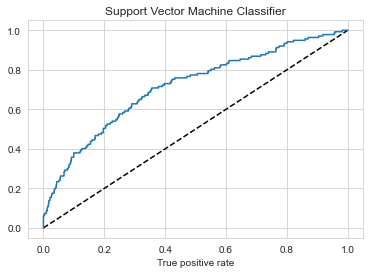

In [55]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="SVM Classifier")
plt.xlabel('False Positive rate')
plt.xlabel('True positive rate')
plt.title("Support Vector Machine Classifier")
plt.show()

In [58]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(svc,'SVM_Agriculture.pkl')

['SVM_Agriculture.pkl']